In [13]:
import json
import tabulate

# Load the JSON data
with open("metrics.json", "r") as f:
    metrics = json.load(f)

# Prepare the data for tabulation
table_data = []
headers = ["Name", "Origin", "Faulty engine", 'Fixed by', "Size", "Function Count"]

for test_name, data in metrics.items():
    metadata = data['metadata']
    table_data.append([
        test_name,
        metadata['origin'],
        metadata['engine'],
        metadata['fixed-by'],
        data['metadata']['code-size'],
        metadata['function_count']
    ])
# Sort the table data by the original size code
table_data.sort(key=lambda row: row[4] if isinstance(row[4], (int, float)) else float('inf'))

# Generate the LaTeX table
latex_table = tabulate.tabulate(table_data, headers, intfmt=",", tablefmt="latex_raw")

# Modify the LaTeX table string
latex_table = latex_table.replace("#", "\\#")

# Save the table to a file
rq1_table_path = f'./table/eval_set.tex'
with open(rq1_table_path, 'w') as file:
    print(latex_table)
    file.write(latex_table)
    print(f"Table saved to {rq1_table_path}")

\begin{tabular}{llllrr}
\hline
 Name          & Origin        & Faulty engine    & Fixed by    &      Size &   Function Count \\
\hline
 wasmedge\#3018 & WASMaker      & wasmedge-96ecb67 & 0.14.0-rc.5 &     1,913 &               12 \\
 wamr\#2789     & WASMaker      & wamr-0b0af1b     & 718f06      &    17,604 &               58 \\
 wasmedge\#3019 & WASMaker      & wasmedge-96ecb67 & 0.14.0-rc.5 &    19,098 &               76 \\
 wamr\#2862     & WASMaker      & wamr-7308b1e     & 0ee5ff      &    19,727 &               73 \\
 wamr\#2450     & WASMaker      & wamr-0b0af1b     & e360b7      &    24,482 &               66 \\
 wasmedge\#3076 & WASMaker      & wasmedge-96ecb67 & 0.14.0-rc.4 &    31,365 &              131 \\
 mandelbrot    & Wasm-R3-Bench & wizard-0d6926f   & 0b43b8      &    64,515 &              167 \\
 wasmedge\#3057 & WASMaker      & wasmedge-96ecb67 & 0.14.0-rc.4 &   243,564 &            1,006 \\
 guiicons      & Wasm-R3-Bench & wizard-0d6926f   & 6d2b057     &   285,8

/tmp/ipykernel_3726278/903640419.py:37: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([wasm_slice_sizes, wasm_reduce_sizes, wasm_hybrid_all_sizes],


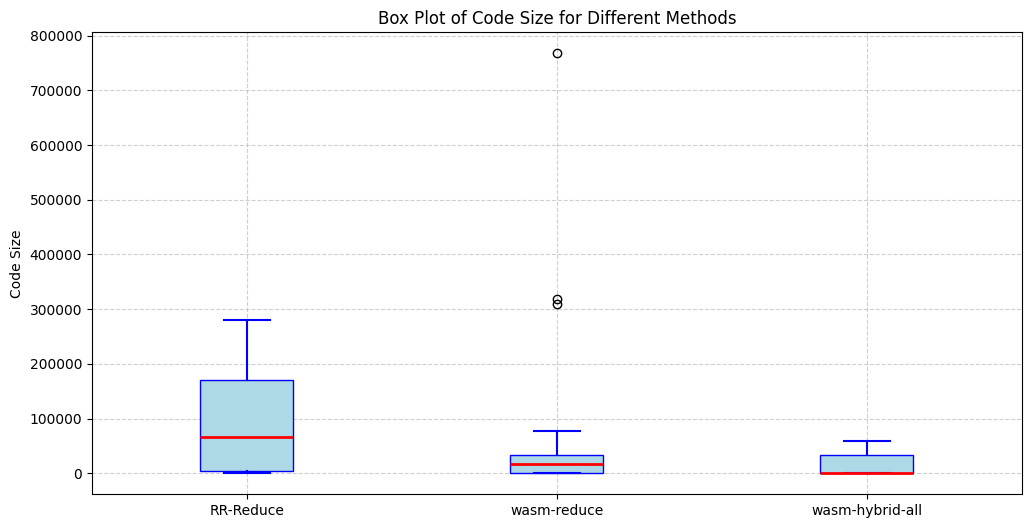

In [14]:
import json
import matplotlib.pyplot as plt
import numpy as np

# Load the JSON data
with open("metrics.json", "r") as f:
    metrics = json.load(f)

# size_to_use = "module-size"
size_to_use = "code-size"

# Collecting code size data
wasm_reduce_sizes = []
wasm_slice_sizes = []
wasm_hybrid_all_sizes = []

test_names = []

for test_name, data in metrics.items():
    try:
        wasm_reduce_code_size = data['wasm-reduce'].get(size_to_use)
        wasm_slice_code_size = data['wasm-slice'].get(size_to_use)
        wasm_hybrid_all_code_size = data['wasm-hybrid-all'].get(size_to_use)

        if wasm_reduce_code_size is not None and wasm_slice_code_size is not None and wasm_hybrid_all_code_size is not None:
            test_names.append(test_name)
            wasm_reduce_sizes.append(wasm_reduce_code_size)
            wasm_slice_sizes.append(wasm_slice_code_size)
            wasm_hybrid_all_sizes.append(wasm_hybrid_all_code_size)
    except Exception as e:
        print(f"Error processing {test_name}: {e}")

# Ensure we have valid numerical data
plt.figure(figsize=(12, 6))

# Create box plots side by side
plt.boxplot([wasm_slice_sizes, wasm_reduce_sizes, wasm_hybrid_all_sizes],
            vert=True, patch_artist=True,
            labels=['RR-Reduce', "wasm-reduce", "wasm-hybrid-all"],
            boxprops=dict(facecolor='lightblue', color='blue'),
            medianprops=dict(color='red', linewidth=2),
            whiskerprops=dict(color='blue', linewidth=1.5),
            capprops=dict(color='blue', linewidth=1.5))

plt.ylabel("Code Size")
plt.title("Box Plot of Code Size for Different Methods")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

In [ ]:
import json
import tabulate
from scipy.stats import gmean

# Load the JSON data
with open("metrics.json", "r") as f:
    metrics = json.load(f)

# Prepare the data for tabulation
table_data = []
# headers = ["Name", "Input Code Size", "RR-Reduce Module Size", "RR-Reduce Code Size", "RR-Reduce Target Size", "wasm-reduce Module Size", "wasm-reduce Code Size"]
# headers = ["Name", "Input Code Size",  "RR-Reduce Code Size", "wasm-reduce Code Size"]
headers = ["Name", "Input Code Size",  "RR-Reduce Code Size", "wasm-reduce Code Size", "wasm-hybrid Code Size"]

# size_to_use = 'module-size'
size_to_use = 'code-size'

for test_name, data in metrics.items():
    try:
        metadata = data['metadata']
        fixed_by = metadata.get('fixed-by')
        original_code_size = data['metadata'].get(size_to_use)
        rr_reduce_code_size = data['wasm-slice'].get('target-size')
        wasm_hybrid_all_code_size = data['wasm-hybrid-all'].get(size_to_use)
        wasm_reduce_code_size = data['wasm-reduce'].get(size_to_use)

        rr_reduce_code_size_percentage = (rr_reduce_code_size / original_code_size) * 100
        wasm_hybrid_all_code_size_percentage = (wasm_hybrid_all_code_size / original_code_size) * 100
        wasm_reduce_code_size_percentage = (wasm_reduce_code_size / original_code_size) * 100
        table_data.append([
            test_name,
            # fixed_by,
            original_code_size,
            rr_reduce_code_size_percentage,
            wasm_reduce_code_size_percentage,
            wasm_hybrid_all_code_size_percentage,
        ])
    except Exception as e:
        print(e)
        continue

for i in range(7):
    table_data.append([
            i,
            # fixed_by,
            6000000,
            0.5,
            10,
            1
    ])

# Sort the table data by the original size
table_data.sort(key=lambda row: float(row[1]))

# Calculate geometric mean for the percentages
geomean_rr_reduce = gmean([row[2] for row in table_data])
geomean_wasm_hybrid_all = gmean([row[3] for row in table_data])
geomean_wasm_reduce = gmean([row[4] for row in table_data])

# # Print cases where wasm-reduce has a smaller reduction rate than RR-Reduce
# for row in table_data:
#     if row[4] < row[3]:
#         print(f"Test case {row[0]}: wasm-reduce reduction rate ({row[4]:.2f}%) is smaller than wasm-hybrid reduction rate ({row[3]:.2f}%)")

# Append the geometric mean row
table_data.append([
    "Geomean",
    "",
    geomean_rr_reduce,
    geomean_wasm_hybrid_all,
    geomean_wasm_reduce
])

# Add percentage symbol to columns 2, 3, and 4
for row in table_data:
    if row[0] != "Geomean":
        row[2] = f"{row[2]:.2f}%"
        row[3] = f"{row[3]:.2f}%"
        row[4] = f"{row[4]:.2f}%"
    else:
        row[2] = f"{row[2]:.2f}%"
        row[3] = f"{row[3]:.2f}%"
        row[4] = f"{row[4]:.2f}%"

latex_table = tabulate.tabulate(table_data, headers, tablefmt="latex_raw", intfmt=",", floatfmt=".2f")

rq2_table_path = f'./table/rq1.tex'
with open(rq2_table_path, 'w') as file:
    file.write(latex_table)
    print(latex_table)
    print(f"Table saved to {rq2_table_path}")

\begin{tabular}{lllll}
\hline
 Name          & Input Code Size   & RR-Reduce Code Size   & wasm-reduce Code Size   & wasm-hybrid Code Size   \\
\hline
 wasmedge#3018 & 1913              & 17.09%                & 1.25%                   & 0.58%                   \\
 wamr#2789     & 17604             & 0.18%                 & 0.05%                   & 0.05%                   \\
 wasmedge#3019 & 19098             & 0.92%                 & 0.06%                   & 0.06%                   \\
 wamr#2862     & 19727             & 7.12%                 & 0.18%                   & 0.18%                   \\
 wamr#2450     & 24482             & 1.87%                 & 0.03%                   & 0.03%                   \\
 wasmedge#3076 & 31365             & 18.89%                & 0.06%                   & 0.06%                   \\
 mandelbrot    & 64515             & 2.57%                 & 0.27%                   & 1.11%                   \\
 wasmedge#3057 & 243564            & 0.17%         

In [13]:
import json
from scipy.stats import gmean
import tabulate

# Load the JSON data
with open("metrics.json", "r") as f:
    metrics = json.load(f)

# Prepare the data for tabulation
table_data = []
headers = ["Name", "Input Code Size", "RR-Reduce Time(s)", "wasm-hybrid Time(s)","wasm-reduce Time(s)"]

for test_name, data in metrics.items():
    try:
        metadata = data['metadata']
        # fixed_by = metadata.get('fixed-by')
        original_size = data['metadata'].get('code-size')
        rr_reduce_time = float(data['wasm-slice'].get('time'))
        wasm_hybrid_all_time = float(data['wasm-hybrid-all'].get('time')) + rr_reduce_time
        wasm_reduce_time = float(data['wasm-reduce'].get('time'))
        table_data.append([
            test_name,
            # fixed_by,
            original_size,
            rr_reduce_time,
            wasm_hybrid_all_time,
            wasm_reduce_time
        ])
    except Exception as e:
        print(e)
        continue

# Sort the table data by the original size
table_data.sort(key=lambda row: float(row[1]))

# Calculate geometric mean for the times
geomean_rr_reduce_time = gmean([row[2] for row in table_data])
geomean_wasm_hybrid_all_time = gmean([row[3] for row in table_data])
geomean_wasm_reduce_time = gmean([row[4] for row in table_data])

# Append the geometric mean row
table_data.append([
    "Geomean",
    "",
    geomean_rr_reduce_time,
    geomean_wasm_hybrid_all_time,
    geomean_wasm_reduce_time
])

latex_table = tabulate.tabulate(table_data, headers, tablefmt="latex_raw", intfmt=",", floatfmt=",.0f")

rq2_table_path = f'./table/rq2.tex'
with open(rq2_table_path, 'w') as file:
    file.write(latex_table)
    print(latex_table)
    print(f"Table saved to {rq2_table_path}")

\begin{tabular}{llrrr}
\hline
 Name          & Input Code Size   &   RR-Reduce Time(s) &   wasm-hybrid Time(s) &   wasm-reduce Time(s) \\
\hline
 wasmedge#3018 & 1913              &                 120 &                   131 &                    15 \\
 wamr#2789     & 17604             &                 245 &                   254 &                   195 \\
 wasmedge#3019 & 19098             &                 121 &                   134 &                   329 \\
 wamr#2862     & 19727             &                 182 &                   215 &                    42 \\
 wamr#2450     & 24482             &                  14 &                    25 &                    29 \\
 wasmedge#3076 & 31365             &               3,600 &                 4,157 &                   537 \\
 mandelbrot    & 64515             &                 137 &                86,537 &                71,808 \\
 wasmedge#3057 & 243564            &                 121 &                   137 &                 